In [164]:
import matplotlib
import tkinter as tk # for Python 3 version
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import time


In [159]:
def plot_cube(cube_definition, figure):
    
    # cube_definition é passado em coordenadas homogêneas, preciso remover isso para poder plotar no eixo 3D.
    cube_definition_adjusted = []
    for point in cube_definition:
        cube_definition_adjusted.append(point[:-1])
         
    # Agora o plot segue normal
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition_adjusted
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k', facecolors=['b','r','g','y','r','k'])

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)
    ax.set_aspect('auto')


def translate(body,dx, dy, dz):
    translation_matrix = np.array([[1,0,0,dx], [0,1,0,dy],[0,0,1,dz],[0,0,0,1]])
    translated_body = translation_matrix.dot(body)
    return translated_body.transpose()


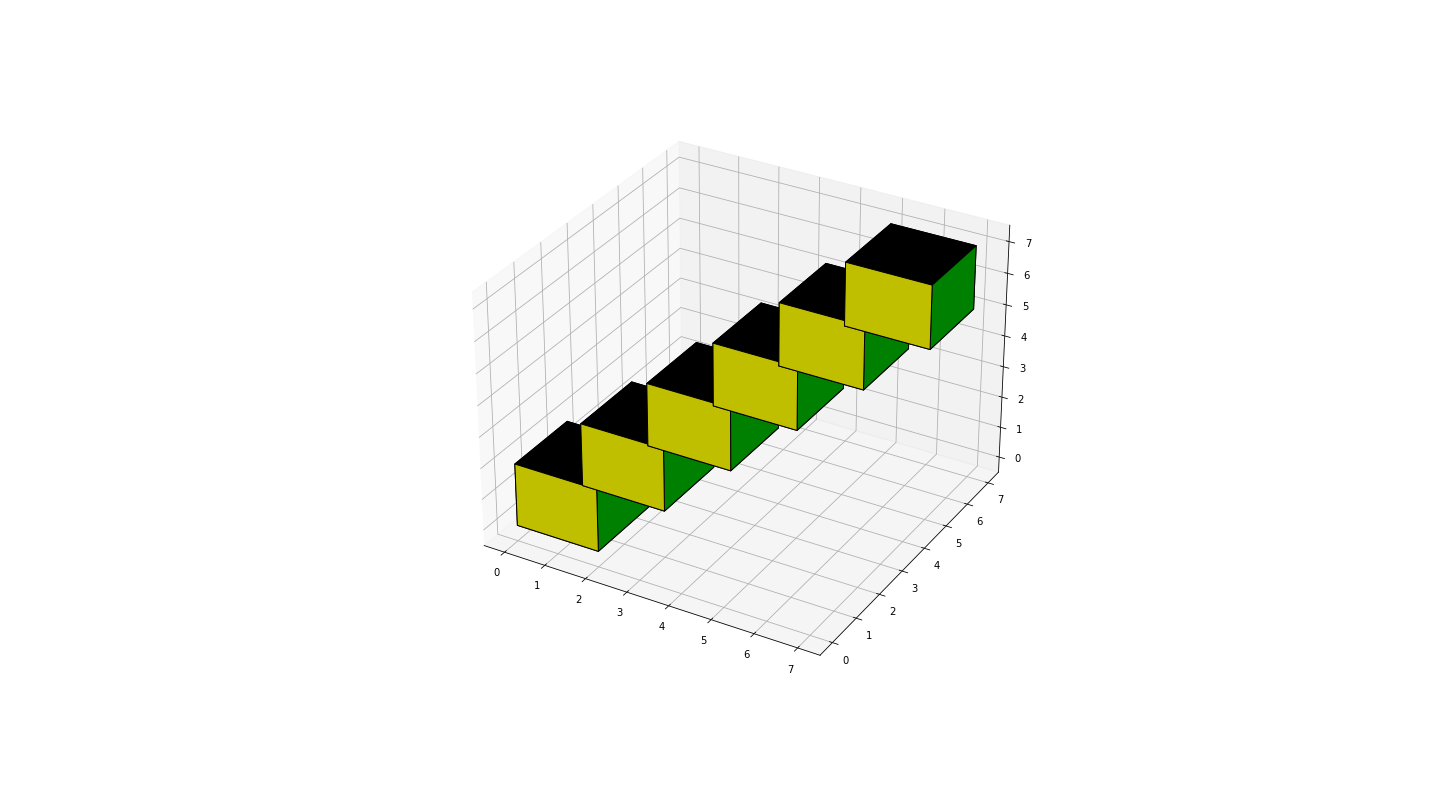

In [171]:
fig = plt.figure(figsize=(20,11))
ax = fig.add_subplot(111, projection='3d')

cube_definition = np.array([[0,0,0,1],[0,2,0,1],[2,0,0,1],[0,0,2,1]])
plot_cube(cube_definition, ax)

index=0
while(index<5):
    
    cube_definition = translate(cube_definition.transpose(), 1, 1, 1)
    plot_cube(cube_definition, ax)
    
    time.sleep(1)
    index = index + 1


